In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import gc
from scipy import fftpack
gc.collect()

0

In [2]:
image_file = 'image/peppers.png'

image = Image.open(image_file).convert('L')
x = np.asarray(image)

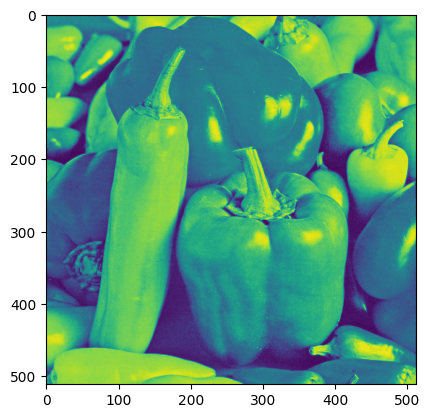

In [3]:
plt.imshow(x)

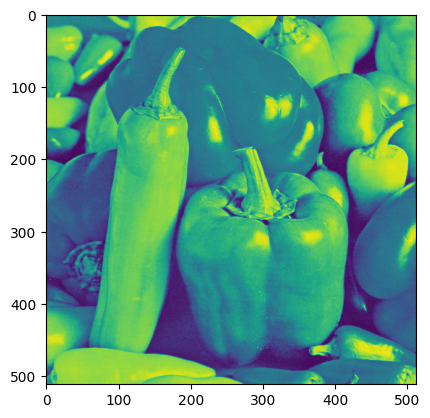

In [4]:
X = np.fft.fftshift(np.fft.fft2(x))
inv = np.fft.ifft2(X)
plt.imshow(abs(inv))

In [5]:
m = 8;  # downsampling coefficient
y = x[::m, ::m]  # input LR image

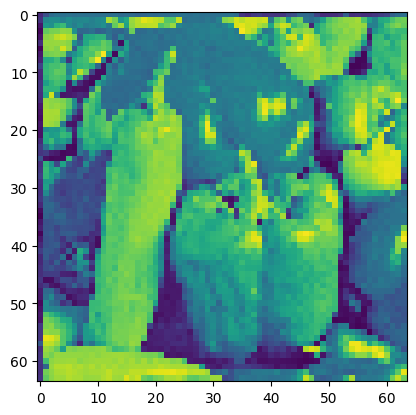

In [6]:
plt.imshow(y)

In [7]:
z = np.zeros(x.shape, dtype=int)
z[::m, ::m] = y

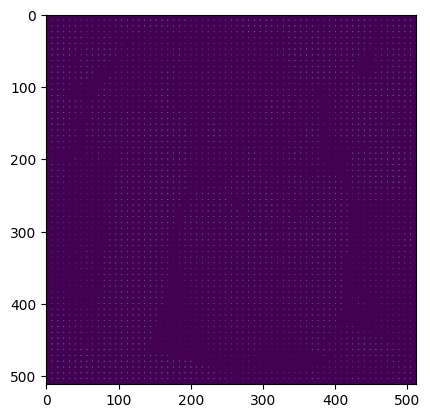

In [8]:
plt.imshow(z)

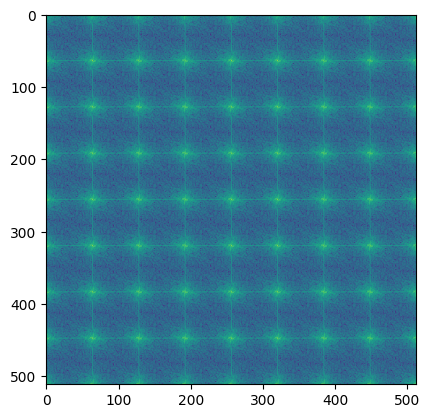

In [9]:
plt.imshow(np.log(abs(np.fft.fftshift(np.fft.fft2(z)))))

/tmp/ipykernel_18992/347938144.py:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(X)))


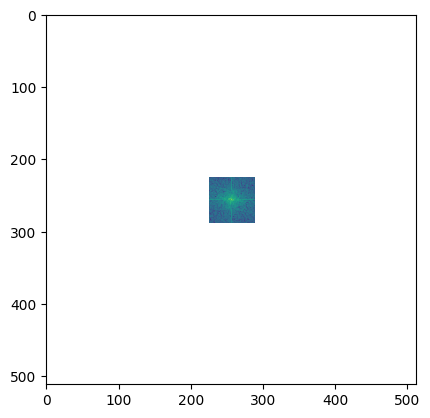

In [10]:
X = np.fft.fft2(z)

X[:225] = 0
X[290:] = 0
X[:, :225] = 0
X[:, 290:] = 0

plt.imshow(np.log(abs(X)))

False


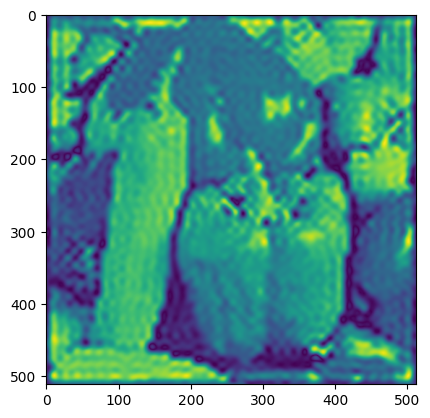

In [11]:
x_hat = abs(np.fft.ifft2(X))
print(min(x_hat[z==0]==0))
plt.imshow(x_hat)

In [12]:
# x_hat[z==0] = 0
# plt.imshow(x_hat)

# print(z!=0)

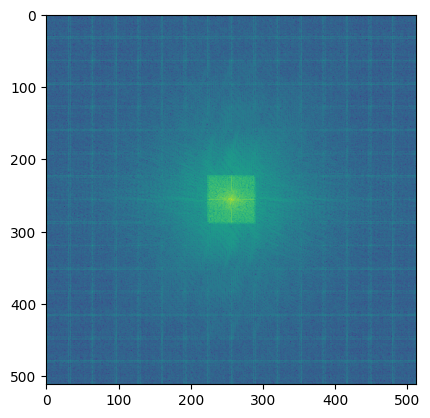

In [13]:
z_hat = z
z1 = z

for i in range(4):    
    Z_hat = np.fft.fft2(z_hat) * 64
    
    plt.imshow(np.log(abs(np.fft.fftshift(Z_hat))))
     
    Z_hat[:225] = 0
    Z_hat[290:] = 0
    Z_hat[:, :225] = 0
    Z_hat[:, 290:] = 0
    
    z_hat = abs(np.fft.ifft2(Z_hat))
    
  
    z_hat[::m, ::m] = z[::m, ::m]  # output SR image
    # z_hat = mask(z_hat, z[::m, ::m])


223.0 223


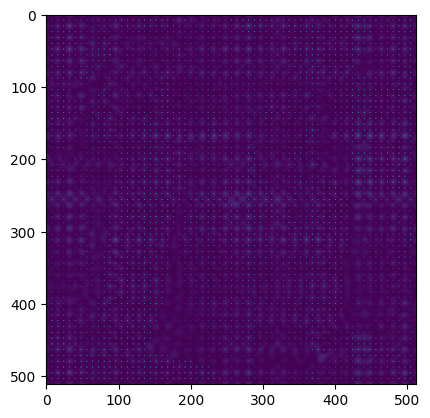

In [14]:
print(z_hat.max(), y.max())
plt.imshow(z_hat)

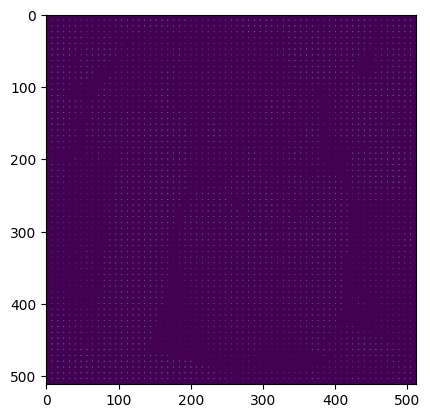

In [15]:
plt.imshow(z1)

[[1 2 3 4 5 6 7 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1 4 7 0]
 [1 4 7 0]
 [1 4 7 0]
 [1 4 7 0]]
[[0 2 3 0 5 6 0 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [0 2 3 0 5 6 0 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [0 2 3 0 5 6 0 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [1 2 3 4 5 6 7 8 9 0]
 [0 2 3 0 5 6 0 8 9 0]]


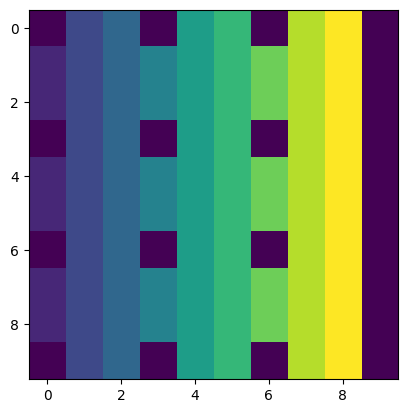

In [16]:
a = np.asarray([[1,2,3,4,5,6,7,8,9,0],[1,2,3,4,5,6,7,8,9,0],[1,2,3,4,5,6,7,8,9,0],[1,2,3,4,5,6,7,8,9,0],[1,2,3,4,5,6,7,8,9,0],[1,2,3,4,5,6,7,8,9,0],[1,2,3,4,5,6,7,8,9,0],[1,2,3,4,5,6,7,8,9,0],[1,2,3,4,5,6,7,8,9,0],[1,2,3,4,5,6,7,8,9,0],])
b = np.asarray([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],])

print(a)
print(b)
print(a[::3,::3])

plt.imshow(a)

a[::3,::3] = b

print(a)

plt.imshow(a)